<a href="https://colab.research.google.com/github/spirosChv/neuro208/blob/main/practicals/Practical_1_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 1: Rate-based model(s) and Numerical Integration methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Make plots nicer
# @markdown Execute this cell!
def mystyle():
  """
  Create custom plotting style.

  Returns
  -------
  my_style : dict
      Dictionary with matplotlib parameters.

  """
  # color pallette
  style = {
      # Use LaTeX to write all text
      "text.usetex": False,
      "font.family": "DejaVu Sans",
      "font.weight": "bold",
      # Use 16pt font in plots, to match 16pt font in document
      "axes.labelsize": 16,
      "axes.titlesize": 20,
      "font.size": 16,
      # Make the legend/label fonts a little smaller
      "legend.fontsize": 14,
      "xtick.labelsize": 14,
      "ytick.labelsize": 14,
      "axes.linewidth": 2.5,
      "lines.markersize": 10.0,
      "lines.linewidth": 2.5,
      "xtick.major.width": 2.2,
      "ytick.major.width": 2.2,
      "axes.labelweight": "bold",
      "axes.spines.right": False,
      "axes.spines.top": False
  }

  return style


plt.rcParams.update(mystyle())

---
# Rate-based models

A simple rate model

\begin{align}
\tau \frac{dr}{dt} &= -r + f(I_{ext})\\
\end{align}

where $\tau$ denotes the time constant and $f(\cdot)$ denotes the activation (transfer) function. You can think $f(\cdot)$ as the equation that discribes the F-I curve of a neuron.

For initial conditions $t=0$ and $r_0 = 0$
the solution to the equation is:
\begin{align}
r(t) &= f(I_{ext}) \left( 1-e^{-\frac{t}{\tau}} \right)
\end{align}


<details>
<summary><font color='green'>Click to see the analytical solution!</font></summary>

### Analytical solution

\begin{align}
\tau \frac{dr}{dt} &= -r + f(I_{ext})\\
\frac{dr}{(r - f(I_{ext}))} &= -\frac{dt}{\tau} \\
\end{align}

Integrate both sides of the equation:

\begin{align}
\int \frac{1}{(r - f(I_{ext})}dr &= \int -\frac{1}{\tau}dt \\
\text{ln} |r - f(I_{ext})| &= -\frac{t}{\tau} + c, c \in \mathbb{R}
\end{align}

Then, we exponentiate both parts to remove the logarithm, i.e., $\text{ln}(\cdot)$

\begin{align}
e^{\text{ln} |r - f(I_{ext})|} &= e^{-\frac{t}{\tau} + c} \\
|r - f(I_{ext})| &= e^{-\frac{t}{\tau}}e^{c} \\
r- f(I_{ext}) &= \pm e^{c} e^{-\frac{t}{\tau}}\\
\end{align}

Let $k = \pm e^{c}, k \in \mathbb{R}$

\begin{align}
r - f(I_{ext}) &= k e^{-\frac{t}{\tau}}\\
\end{align}

At $t=0$, $r_0$ is zero, thus $r_0=0$

\begin{align}
r(t=0) - f(I_{ext}) &= k e^{-\frac{t=0}{\tau}}\\
k &= - f(I_{ext})
\end{align}

Thus, the solution is:

\begin{align}
r(t) - f(I_{ext}) &= - f(I_{ext}) e^{-\frac{t=0}{\tau}}\\
r(t) &= f(I_{ext}) \left( 1-e^{-\frac{t}{\tau}} \right)
\end{align}

At $t=\tau$, $r$ is $r =f(I_{ext}) (1-e^{-1})$, $1-e^{-1} \approx 0.63$

So, the time constant denotes the time needed for rate to reach the 63% of its steady state-value.

**Note:** Steady-state is the value of the rate at which the derivative is zero.
</details>

### Numerical solution - Euler Method

\begin{align}
\tau \frac{dr}{dt} &= -r + f(I_{ext}) \\
\\
\frac{dr}{dt} &= \frac{-r + f(I_{ext})}{\tau}
\end{align}

This can be **approximated** as:

\begin{align}
\frac{r[n+1]-r[n]}{t_{n+1}-t_n} &= \frac{-r[n] + f(I_{ext}[n])}{\tau} \\
\end{align}

, where n is the nth step of the simulation. By choosing a $\Delta t$:

\begin{align}
Δt &= {t_{n+1}-t_n}\
\end{align}

\begin{align}
N = T / Δt,
\end{align}
, where $N$ is the total number of steps and $T$ is the total simulation time.

The (forward) Euler method gives:

\begin{align}
r[n+1] =r[n] + \Delta t \frac{-r[n] + f \left( I_{ext}[n] \right)} {\tau}
\end{align}

***What does the right-hand side of the above equation above say about how Euler approximates the exact value?***

---
# Euler method: A simple example

Let us model the exponential function, i.e., $g(t) = e^{-t}$. We know that its derivative with respect to time is

\begin{equation}
\frac{dg}{dt} = -e^{-t}
\end{equation}

Let's also assume that $g(0)=1$, i.e., at time point zero our functions has value equals to one.

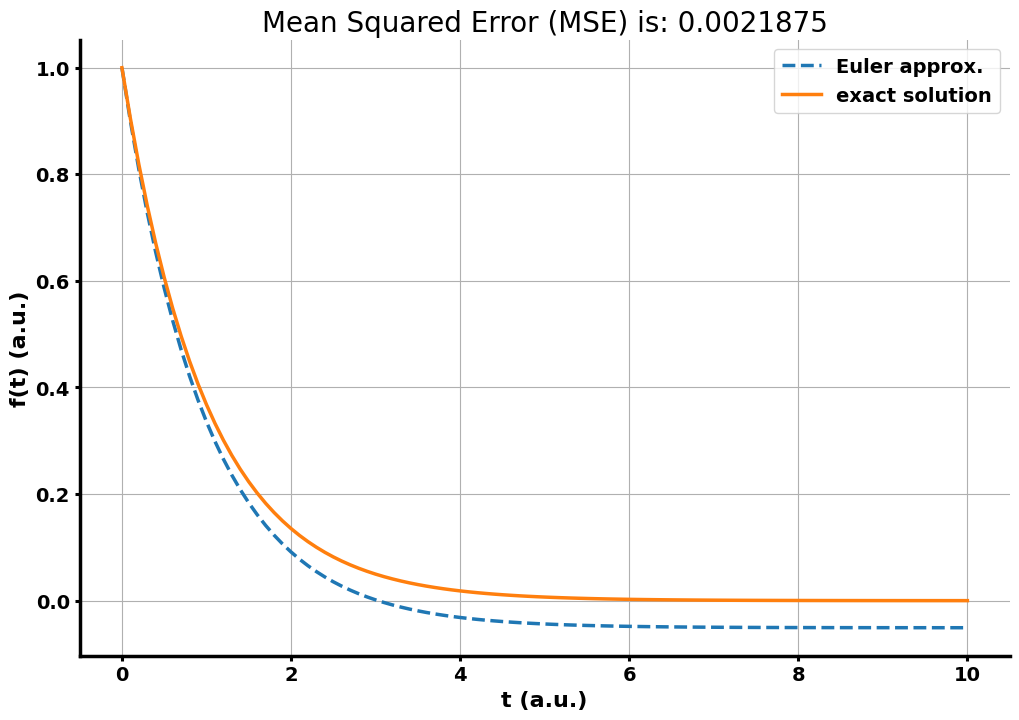

In [3]:
T = 10  #  total simulation time (a.u.)
dt = 0.1  # time step (also known as integration step) (a.u.)
N = int(T/dt)  # total number of steps

# t = np.arange(0, T + dt, dt)  # alternatively we can use np.linspace
t = np.linspace(0, T, N + 1)
g_exact = np.exp(-t)

g_approx = np.zeros((N + 1, ))
g_approx[0] = 1  # initial condition
for n in range(N):
  dgdt = -np.exp(-t[n]) # note that t[n] = n*dt
  g_approx[n + 1] = g_approx[n] + dt*dgdt

# Calculate the error (i.e., mean squared error)
error = np.mean((g_exact - g_approx)**2)

plt.figure(figsize=(12, 8))
plt.plot(t, g_approx, label='Euler approx.', linestyle='dashed')
plt.plot(t, g_exact, label='exact solution')
plt.xlabel('t (a.u.)')
plt.ylabel('f(t) (a.u.)')
plt.title(f"Mean Squared Error (MSE) is: {np.round(error, 7)}")
plt.legend()
plt.grid()
plt.show()

In [4]:
import ipywidgets as widgets
# @title The role of time integration step, Δt or dt

# @markdown Play with the widget and understand the role of `dt` for Euler integration!
def euler_method_example(dt):
  """
  Euler method for an exponential function.
  """
  T = 10  #  total simulation time (a.u.)
  N = int(T/dt)  # total number of steps

  # t = np.arange(0, T + dt, dt)  # alternatively we can use np.linspace
  t = np.linspace(0, T, N + 1)
  g_exact = np.exp(-t)

  g_approx = np.zeros((N + 1, ))
  g_approx[0] = 1  # initial condition
  for n in range(N):
    deriv = -np.exp(-t[n])
    g_approx[n + 1] = g_approx[n] + dt*deriv

  # Calculate the error
  error = np.mean((g_exact - g_approx))**2

  plt.figure(figsize=(8, 6))
  plt.plot(t, g_approx, label=f'approximate, dt={dt}', linestyle='dashed')
  plt.plot(t, g_exact, label='exact')
  plt.xlabel('t (a.u.)')
  plt.ylabel('f(t) (a.u.)')
  plt.title(f"Mean Squared Error (MSE) is: {np.round(error, 7)}")
  plt.legend()
  plt.grid()
  plt.show()


dt = widgets.FloatSlider(
    value=1,
    min=0.001,
    max=2.0,
    step=0.01,
    readout_format='.3f',
)

_ = widgets.interact(euler_method_example, dt=dt)

interactive(children=(FloatSlider(value=1.0, description='dt', max=2.0, min=0.001, readout_format='.3f', step=…

---
# Rate-base models -- Example 1: A simple network model

\begin{align}
\tau \frac{d\textbf{r}}{dt} &= -\textbf{r} + f(I_{ext} + \textbf{W}\textbf{r}+\xi) \\
\textbf{r}[n+1] &= \textbf{r}[n] + \Delta t \frac{-\textbf{r}[n] + f(I_{ext}[n]+ \textbf{W}\textbf{r}[n]+\xi[n])}{\tau}
\end{align}

where $\textbf{r} \in \mathbb{R}^{D \times N}$, $I_{ext}\in \mathbb{R}^{D \times N}$ and $\textbf{W} \in \mathbb{R}^{D \times D}$, and $f(\cdot)$ denotes the activation (transfer) function, and $D$ is the total number of neurons and $\xi$ denotes random noise, with $\xi \sim \mathcal{N}(\mu=0, \sigma=1)$,  $\mathcal{N}(\cdot)$ is the normal distribution.

## The transfer function

In our example, we will use as $f(\cdot)$ the sigmoid, with two parameters the gain $\gamma$, and the threshold level $\theta$.

The most common mathematical description of the sigmoid function is:

\begin{equation}
f(z| \gamma, \theta) = \frac{1}{1+\text{exp}(-\gamma(z-\theta))}
\end{equation}

Another mathematical description, commonly used in rate based models is:

\begin{equation}
f(z|\gamma,\theta) = \frac{1}{1+\text{exp}(-\gamma(z-\theta))} - \frac{1}{1+\text{exp}(\gamma\theta)}
\end{equation}

In [5]:
def sigmoid(z, theta=0, gamma=1):
  """
  The signoidal transfer function.

  ---
  Args:
    z : float or numpy.ndarray
      The input value(s)
    theta: float
      The midpoint, z1/2. Default is 0.
    gamma : float
      The slope of the function. Negative values reverse the function.
      Default is 1.

  ---
  Returns:
    float or numpy.ndarray
      The output of the sigmoid are values in [0,1].
  """
  return 1/(1 + np.exp(-gamma * (z - theta)))

In [6]:
print(f"The value of the sigmoid is: {sigmoid(z=1)}")

The value of the sigmoid is: 0.7310585786300049


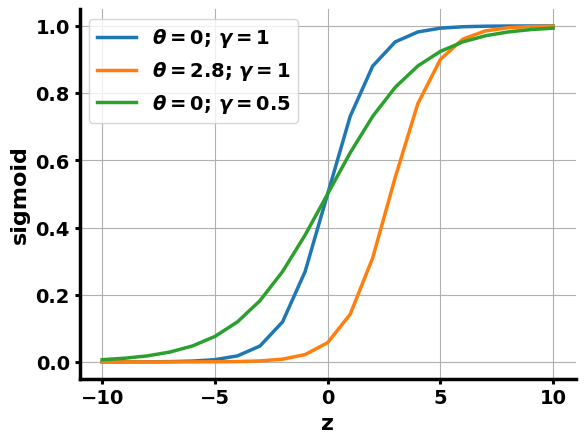

In [7]:
# define a range of values
z = np.arange(-10, 11, 1)

# Make the plot
plt.figure()
plt.plot(z, sigmoid(z), label=r'$\theta=0$; $\gamma=1$')
theta = 2.8
plt.plot(z, sigmoid(z, theta=theta), label=fr'$\theta={theta}$; $\gamma=1$')
gamma = 0.5
plt.plot(z, sigmoid(z, gamma=gamma), label=fr'$\theta=0$; $\gamma={gamma}$')
plt.xlabel('z')
plt.ylabel('sigmoid')
plt.grid()
plt.legend()
plt.show()

In [8]:
import ipywidgets as widgets
# @title How to shape your sigmoid!

# @markdown Play with the widget and understand the role of `theta` and `gamma`!
def plot_sigmoid(theta, gamma):
  """
  Euler method for an exponential function.
  """
  zmin = -10
  zmax = 11
  z = np.arange(zmin, zmax, 1)

  plt.figure()
  plt.plot(
      z,
      sigmoid(z),
      label=fr'default $\theta=0$ and $\gamma=1$'
  )
  plt.plot(
      z,
      sigmoid(z, theta, gamma),
      label=fr'$\theta={theta}$; $\gamma={gamma}$'
  )
  plt.xlabel('z')
  plt.ylabel('sigmoid')
  plt.grid()
  plt.legend()
  plt.show()


theta = widgets.FloatSlider(
    value=0,
    min=-2,
    max=10,
    step=0.1,
    readout_format='.1f',
    description='theta',
)

gamma = widgets.FloatSlider(
    value=1,
    min=0.,
    max=5.,
    step=0.1,
    readout_format='.1f',
    description='gamma',
)

_ = widgets.interact(plot_sigmoid, theta=theta, gamma=gamma)

interactive(children=(FloatSlider(value=0.0, description='theta', max=10.0, min=-2.0, readout_format='.1f'), F…

**Questions:**

- How does the slope parameter ($\gamma$) affect the sigmoid function?
- How does the threshold parameter ($\theta$) affect the sigmoid function?

## Constract the weight matrix

In the weight matric $\textbf{W}[\text{row}, \text{column}]$ rows correspond to postsynaptic neurons and columns to presynaptic neurons.

In [9]:
np.random.seed(2021)
D = 5  # number of neurons
W = np.random.rand(D, D)  # Weight matrix
np.fill_diagonal(W, 0)  # remove autopses
print(W)

[[0.         0.73336936 0.13894716 0.31267308 0.99724328]
 [0.12816238 0.         0.75292543 0.66216051 0.78431013]
 [0.0968944  0.05857129 0.         0.61655744 0.08662996]
 [0.56127236 0.61652471 0.96384302 0.         0.37116085]
 [0.45214524 0.20185025 0.56930512 0.19509597 0.        ]]


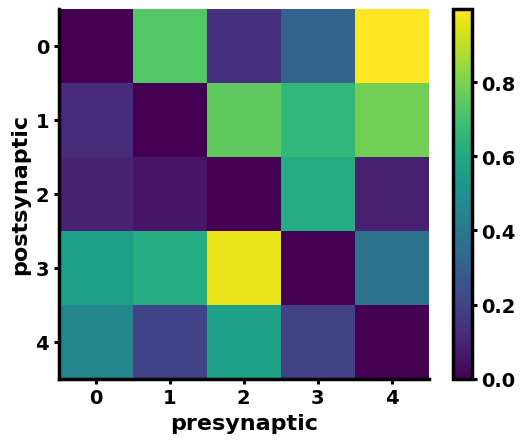

In [10]:
plt.figure()
plt.imshow(W)
plt.xlabel('presynaptic')
plt.ylabel('postsynaptic')
plt.colorbar()
plt.show()

In [11]:
np.random.seed(2024)
T = 1000  # ms
dt = 0.1  # ms
N = int(T/dt)
t = np.linspace(0, T, N + 1)
Iext = 0.1
tau = 12  # ms
r = np.zeros((D, N + 1))
# Initial rate values for all neurons
r[:, 0] = 0.01

for n in range(N):
  for d in range(D): #for each postsynaptic neuron
    z1 = Iext + np.dot(W[d, :], r[:, n]) + np.random.randn()
    drdt = (-r[d, n] + sigmoid(z1, theta=2))/tau
    r[d, n+1] = r[d, n] + dt*drdt

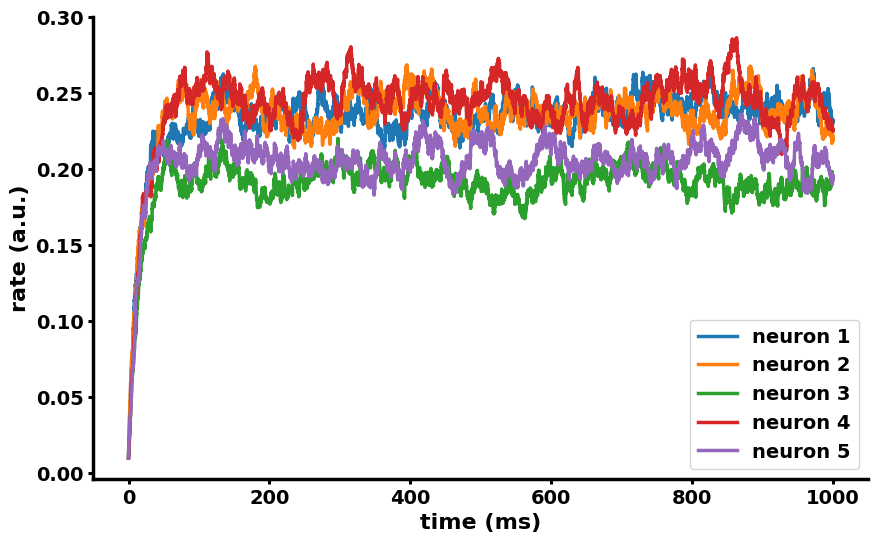

In [12]:
plt.figure(figsize=(10, 6))
for d in range(D):
  plt.plot(t, r[d, :], label=f'neuron {d + 1}')
plt.xlabel('time (ms)')
plt.ylabel('rate (a.u.)')
plt.legend()
plt.show()

---
# Rate-base models -- Example 2: Wilson-Cowan rate based model

Using the mean-field approach

\begin{align}
\tau_E \frac{dr_{E}}{dt} &= -r_{E} + f(I_{ext,E}+W_{EE}r_{E}-W_{EI}r_{I} + \xi) \\
\tau_I \frac{dr_{I}}{dt} &= -r_{I} + f(I_{ext,I}+W_{IE}r_{E}-W_{II}r_{I} + \xi)
\end{align}

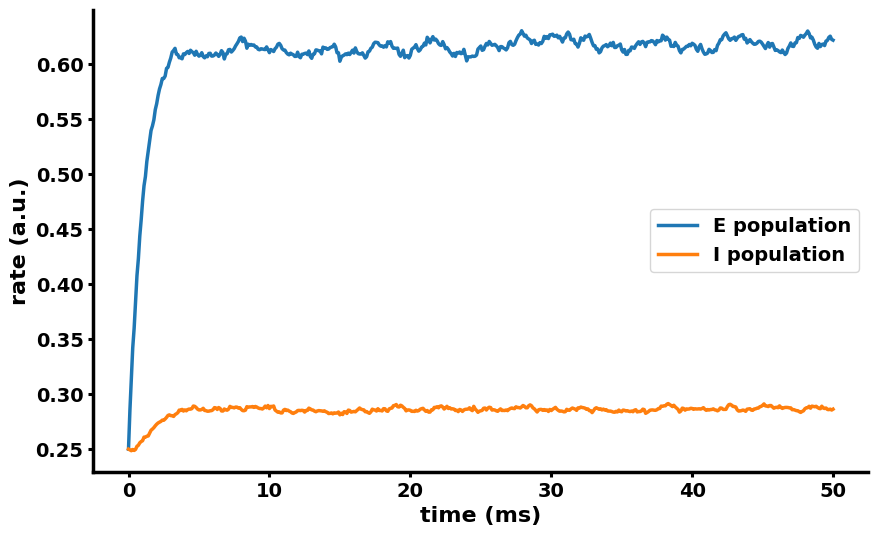

In [13]:
np.random.seed(2024)
dt = 0.1  # ms
T = 50  # ms
N = int(T/dt)
time = np.linspace(0, T, N + 1)

# preallocation
rE = np.zeros((N + 1, ))
rI = np.zeros((N + 1, ))

# parameters
tauE = 1.0  # ms
tauI = 2.0  # ms
WEE = 1  # From E to E
WEI = 4  # From I to E
WIE = 2  # From E to I
WII = 11  # From I to I
I_E = 1  # external current to E population
I_I = 1  # external current to I population

# Initial conditions
rE[0] = .25
rI[0] = .25

sigma = 0.1  # level of noise
for n in range(N):
  drEdt = (-rE[n] + sigmoid(I_E + WEE*rE[n] - WEI*rI[n] + sigma*np.random.randn()))/tauE
  rE[n+1] = rE[n] + dt * drEdt

  drIdt = (-rI[n] + sigmoid(I_I + WIE*rE[n] - WII*rI[n] + sigma*np.random.randn()))/tauI
  rI[n+1] = rI[n] + dt * drIdt


plt.figure(figsize=(10, 6))
plt.plot(time, rE, label='E population')
plt.plot(time, rI, label='I population')
plt.xlabel('time (ms)')
plt.ylabel('rate (a.u.)')
plt.legend()
plt.show()

In [14]:
import ipywidgets as widgets
# @title How to shape your sigmoid!

# @markdown Play with the widget and understand the role of the weights!
def plot_wc_model(WEE, WEI, WIE, WII, thetaE=0, gammaE=1.,
                  thetaI=0., gammaI=1., I_E=1.0, I_I=1.0):
  np.random.seed(2024)
  dt = 0.1  # ms
  T = 50  # ms
  N = int(T/dt)
  time = np.linspace(0, T, N + 1)

  # preallocation
  rE = np.zeros((N + 1, ))
  rI = np.zeros((N + 1, ))

  # parameters
  tauE = 1.0  # ms
  tauI = 2.0  # ms

  # Initial conditions
  rE[0] = .25
  rI[0] = .25

  sigma = 0.1  # level of noise
  for n in range(N):
    zE = I_E + WEE*rE[n] - WEI*rI[n] + sigma*np.random.randn()
    drEdt = (-rE[n] + sigmoid(zE, theta=thetaE, gamma=gammaE))/tauE
    rE[n+1] = rE[n] + dt * drEdt

    zI = I_I + WIE*rE[n] - WII*rI[n] + sigma*np.random.randn()
    drIdt = (-rI[n] + sigmoid(zI, theta=thetaI, gamma=gammaI))/tauI
    rI[n+1] = rI[n] + dt * drIdt


  plt.figure(figsize=(10, 6))
  plt.plot(time, rE, label='E population')
  plt.plot(time, rI, label='I population')
  plt.xlabel('time (ms)')
  plt.ylabel('rate (a.u.)')
  plt.legend()
  plt.show()


WEE = widgets.FloatSlider(
    value=1,
    min=0,
    max=15,
    step=0.1,
    readout_format='.1f',
    description='wEE',
)

WEI = widgets.FloatSlider(
    value=1,
    min=0,
    max=15,
    step=0.1,
    readout_format='.1f',
    description='wEI',
)

WIE = widgets.FloatSlider(
    value=1,
    min=0,
    max=15,
    step=0.1,
    readout_format='.1f',
    description='wIE',
)

WII = widgets.FloatSlider(
    value=1,
    min=0,
    max=15,
    step=0.1,
    readout_format='.1f',
    description='wII',
)

thetaE = widgets.FloatSlider(
    value=0,
    min=0,
    max=10,
    step=0.1,
    readout_format='.1f',
    description='thetaE',
)

gammaE = widgets.FloatSlider(
    value=1,
    min=0.1,
    max=5,
    step=0.1,
    readout_format='.1f',
    description='gammaE',
)

thetaI = widgets.FloatSlider(
    value=0,
    min=0,
    max=10,
    step=0.1,
    readout_format='.1f',
    description='thetaI',
)

gammaI = widgets.FloatSlider(
    value=1,
    min=0.1,
    max=5,
    step=0.1,
    readout_format='.1f',
    description='gammaI',
)

I_E = widgets.FloatSlider(
    value=1,
    min=0.0,
    max=2,
    step=0.1,
    readout_format='.1f',
    description='I_E',
)

I_I = widgets.FloatSlider(
    value=1,
    min=0.0,
    max=2,
    step=0.1,
    readout_format='.1f',
    description='I_I',
)

_ = widgets.interact(
    plot_wc_model,
    WEE=WEE, WEI=WEI, WIE=WIE, WII=WII,
    thetaE=thetaE, gammaE=gammaE,
    thetaI=thetaI, gammaI=gammaI,
    I_E=I_E, I_I=I_I
)

interactive(children=(FloatSlider(value=1.0, description='wEE', max=15.0, readout_format='.1f'), FloatSlider(v…

Play with the variables to see how the output is affected.

Try the following values:

$W_{EE}=6.4, W_{EI}=4.9, W_{IE}=6.0, W_{II}=1.5, \theta_E=2.7, \gamma_E=1.1, \theta_I=4.1, \gamma_I=1.0, I_E=0.6$ and $I_I=0$.


What do you observe?


---
# Rate-base models -- Example 3: Inhibitory population generates oscillations

Using the mean field approach

\begin{align}
\tau_I \frac{dr_{I}(t)}{dt} = -r_{I}(t) + f\left( I_{ext} - W_{II}r_{I}(t - delay_{time}) \right) \\
r_I[n+1]= r_I[n]+ Δt \frac{-r_I[n]+ f(I_{ext}+ W_{II}r_I[n-delay])}{\tau_I}
\end{align}

- Oscillations at a frequency $f_{crit}$ appear when $W_{II} > W_{crit}$
- For $delay >> \tau_I$:
  - $W_{crit} \sim \pi \tau_I / (2\cdot delay)$
  - $f_{crit} \sim 1/(4 \cdot delay)$
- Frequency is controlled by the delays, i.e., $delay$ parameter.

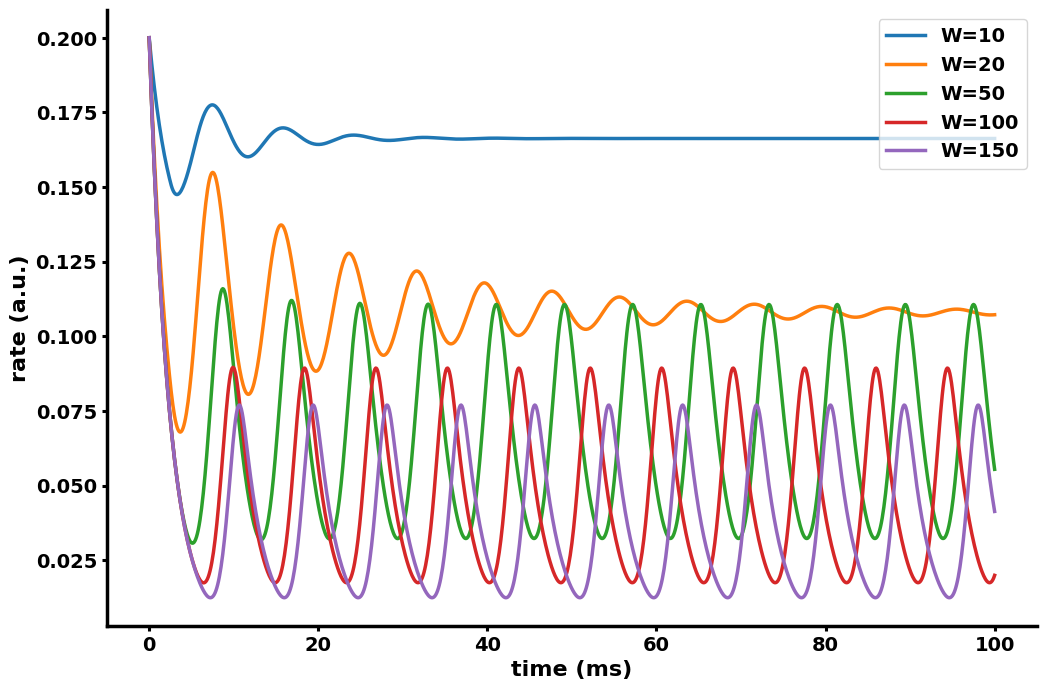

In [15]:
T = 100  # ms
dt = 0.1  # ms
N = int(T/dt)
t = np.linspace(0, T, N + 1)

Iext = .05
tauI = 2.5  # ms
time_delay = 2.5  # delay in ms
delay = int(time_delay/dt)  # delay in steps

plt.figure(figsize=(12, 8))
for WII in [10, 20, 50, 100, 150]:
  rI = np.zeros((N + 1, ))
  rI[0] = 0.2
  for n in range(N):
    n_ = 0 if n - delay < 0 else n - delay

    drIdt = (-rI[n] + sigmoid(Iext - WII*rI[n_]))/tauI
    rI[n + 1] = rI[n] + dt*drIdt

  plt.plot(t, rI, label=f"W={WII}")

plt.legend()
plt.xlabel('time (ms)')
plt.ylabel('rate (a.u.)')
plt.show()

---
## (Optional) Appendix: More numerical methods

Let's assume that we have to solve: $\frac{dr}{dt} = \dot{r} = h(r)$

1. As we have seen, the forward Euler method is described by:

\begin{equation}
r[n+1] = r[n] + \Delta t \left( h(r[n]) \right)
\end{equation}


2. The backword Euler method is described by:

\begin{equation}
r[n+1] = r[n] + \Delta t \left( h(r[n+1]) \right)
\end{equation}

3. The central difference:

\begin{equation}
r[n+1] = r[n] + \Delta t \frac{1}{2} \left( h(r[n+1]) + h(r[n]) \right)
\end{equation}

4. The fourth-order Runge-Kutta (rk4):

\begin{equation}
r[n+1] = r[n] + \frac{1}{6} \left( k_1 + 2k_2 + 2k_3 + k_4 \right)
\end{equation}

, where $h=\frac{dr}{dt}$

\begin{align}
k_1 &= \Delta t h(x_n)\\
k_2 &= \Delta t h\left( x_n + \frac{1}{2}k_1 \right)\\
k_3 &= \Delta t h\left( x_n + \frac{1}{2}k_2 \right)\\
k_4 &= \Delta t h\left( x_n + k_3 \right)\\
\end{align}

### Example: Solve the equation $\dot{r} = -r, r_0=10$

In [16]:
def derivative(x):
  return -x

def mse(x, y):
  return np.mean((x - y)**2)

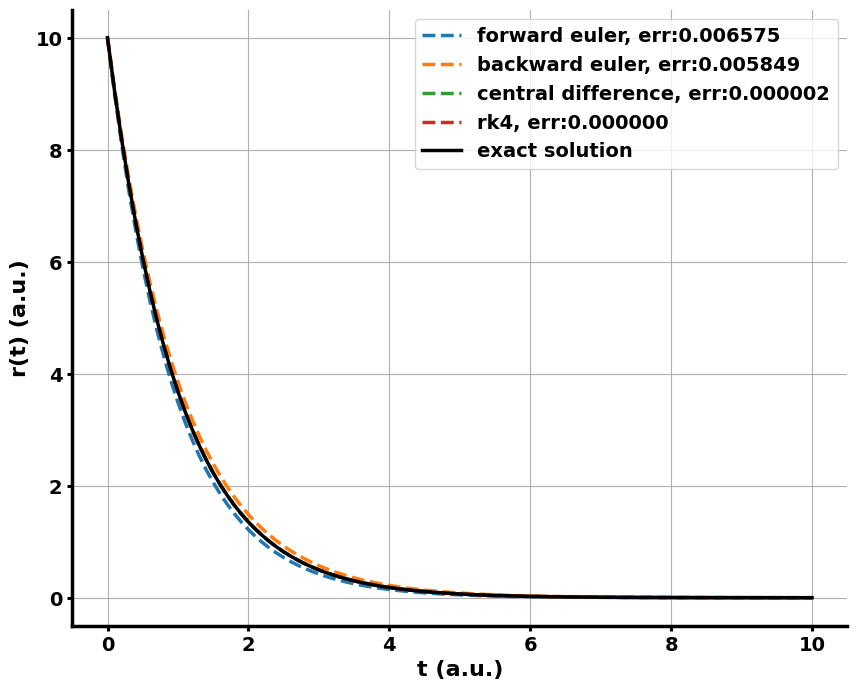

In [17]:
T = 10  #  total simulation time (a.u.)
dt = .1  # time step (also known as integration step) (a.u.)
N = int(T/dt)  # total number of steps

r0 = 10
t = np.linspace(0, T, N + 1)
r_exact = r0*np.exp(-t)

r_approx_feuler = np.zeros((N + 1, ))
r_approx_feuler[0] = r0  # initial condition
r_approx_beuler = np.zeros((N + 1, ))
r_approx_beuler[0] = r0  # initial condition
r_approx_ceuler = np.zeros((N + 1, ))
r_approx_ceuler[0] = r0  # initial condition
r_approx_rk4 = np.zeros((N + 1, ))
r_approx_rk4[0] = r0  # initial condition


for n in range(N):
  r_approx_feuler[n + 1] = r_approx_feuler[n] + dt*derivative(r_approx_feuler[n])
  r_approx_beuler[n + 1] = r_approx_beuler[n] / (1 + dt)
  r_approx_ceuler[n + 1] = (r_approx_ceuler[n] + (dt/2)*(derivative(r_approx_ceuler[n])))/(1 + dt/2)

  k1 = dt*derivative(r_approx_rk4[n])
  k2 = dt*derivative(r_approx_rk4[n] + k1/2)
  k3 = dt*derivative(r_approx_rk4[n] + k2/2)
  k4 = dt*derivative(r_approx_rk4[n] + k3)
  r_approx_rk4[n + 1] = r_approx_rk4[n] + 1/6*(k1 + 2*k2 + 2*k3 + k4)

# Calculate the error
error_feuler = mse(r_exact, r_approx_feuler)
error_beuler = mse(r_exact, r_approx_beuler)
error_ceuler = mse(r_exact, r_approx_ceuler)
error_rk4 = mse(r_exact, r_approx_rk4)

plt.figure(figsize=(10, 8))
plt.plot(t, r_approx_feuler, label=f'forward euler, err:{error_feuler:5f}', linestyle='dashed')
plt.plot(t, r_approx_beuler, label=f'backward euler, err:{error_beuler:5f}', linestyle='dashed')
plt.plot(t, r_approx_ceuler, label=f'central difference, err:{error_ceuler:5f}', linestyle='dashed')
plt.plot(t, r_approx_rk4, label=f'rk4, err:{error_rk4:5f}', linestyle='dashed')
plt.plot(t, r_exact, label='exact solution', color='k')
plt.xlabel('t (a.u.)')
plt.ylabel('r(t) (a.u.)')
plt.legend()
plt.grid()
plt.show()

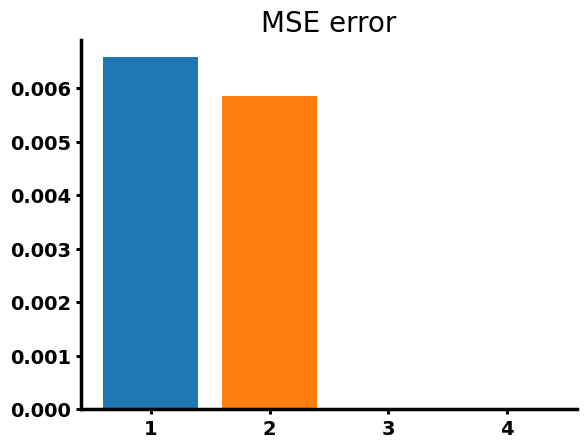

In [18]:
plt.figure()
plt.title('MSE error')
plt.bar(x=1, height=error_feuler)
plt.bar(x=2, height=error_beuler)
plt.bar(x=3, height=error_ceuler)
plt.bar(x=4, height=error_rk4)
plt.show()